# Face Feature Extraction
## Using PCA
By Meghna Maan

In [1]:
# Import matplotlib library
import matplotlib.pyplot as plt

# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from timeit import default_timer as time
import numpy as np


In [2]:
# this command will download the LFW_people's dataset to hard disk.
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# Instead of providing 2D data, X has data already in the form of a vector that
# is required in this approach.
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

# Print Details about dataset
print("Number of Data Samples: % d" % n_samples)
print("Size of a data sample: % d" % n_features)
print("Number of Class Labels: % d" % n_classes)


Number of Data Samples:  1288
Size of a data sample:  1850
Number of Class Labels:  7


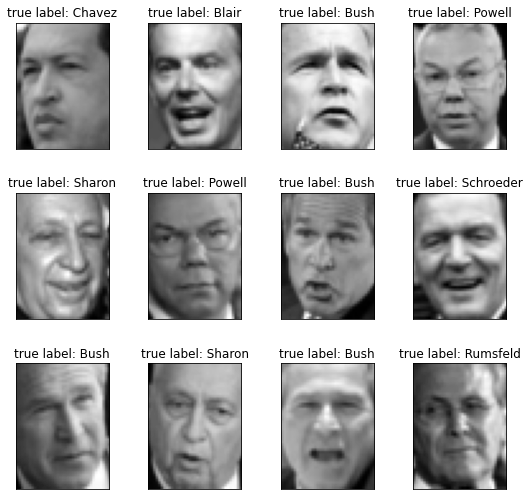

In [3]:
# Function to plot images in 3 * 4
def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4):
    plt.figure(figsize =(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())

# Generate true labels above the images
def true_title(Y, target_names, i):
    true_name = target_names[Y[i]].rsplit(' ', 1)[-1]
    return 'true label: % s' % (true_name)

true_titles = [true_title(y, target_names, i)
                    for i in range(y.shape[0])]
plot_gallery(X, true_titles, h, w)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42)
print("size of training Data is % d and Testing Data is % d" %(
        y_train.shape[0], y_test.shape[0]))


size of training Data is  966 and Testing Data is  322


In [5]:
n_components = 150

t0 = time()
pca = PCA(n_components = n_components, svd_solver ='randomized',
        whiten = True).fit(X_train)
print("done in % 0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in % 0.3fs" % (time() - t0))


done in  0.560s
Projecting the input data on the eigenfaces orthonormal basis
done in  0.016s


In [6]:
print("Sample Data point after applying PCA\n", X_train_pca[0])
print("-----------------------------------------------------")
print("Dimesnsions of training set = % s and Test Set = % s"%(
        X_train.shape, X_test.shape))


Sample Data point after applying PCA
 [-2.0756035  -1.0457904   2.126937    0.03683083 -0.757573   -0.51736355
  0.8555055   1.0519403   0.45773074  0.01348705 -0.03963726  0.6387283
  0.48167613  2.3378525   1.7784482   0.13307267 -2.2713845  -4.456902
  2.0977046  -1.1379371   0.18842652 -0.33498168  1.1254576  -0.32403407
  0.14093925  1.0769604   0.758812   -0.09975913  3.1199527   0.88379574
 -0.8933758   1.1596044   1.4306643   1.6856185   1.3434469  -1.2591127
 -0.6391444  -2.3363194  -0.01368678 -1.4638654  -0.4688561  -1.0548187
 -1.3327788   1.1364756   2.2223864  -1.801577   -0.30629218 -1.0283804
  4.7736406   3.4596791   1.9260234  -1.351455   -0.25873357  2.0101488
 -1.0563037   0.36064062  1.1706135   0.75692415  0.9003584   0.59984
 -0.46510935  2.0974746   1.3453175   1.9334991   5.0666437  -0.706717
  0.60821766 -0.89914393 -0.21617031 -2.1084127  -1.6814625  -0.19675632
 -1.7466899  -3.0545106   2.0537307   0.3923177   0.12843524  1.2110431
 -0.7932091  -1.4004451  -

In [7]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
            'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel ='rbf', class_weight ='balanced'), param_grid
)
clf = clf.fit(X_train_pca, y_train)
print("done in % 0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in % 0.3fs" % (time() - t0))
# print classification results
print(classification_report(y_test, y_pred, target_names = target_names))
# print confusion matrix
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(n_classes)))


Fitting the classifier to the training set
done in  26.581s
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.005)
Predicting people's names on the test set
done in  0.133s
                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.46      0.60        13
     Colin Powell       0.78      0.87      0.82        60
  Donald Rumsfeld       0.89      0.63      0.74        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.96      0.75      0.84        36

         accuracy                           0.85       322
        macro avg       0.90      0.72      0.78       322
     weighted avg       0.86      0.85      0.84       322

Confusion Matrix is:
[[  6   2   0   5   0   0   0]
 [  1  52   1   6   0   0   0]
 [  0   2  17   8   0   0   0]
 [  0   3   0 143   0   0  